## Import Libraries

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

## Load the training and testing set

In [2]:
df_train = pd.read_csv("../data/training_set.csv")
df_test = pd.read_csv("../data/testing_set.csv")

In [3]:
#Train test split
X_train = df_train.iloc[:, :-1]
y_train = df_train["price"]
X_test = df_test.iloc[:, :-1]
y_test = df_test["price"]

## SGDRegressor

In [4]:
# Create the model
reg = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.1)

# Fit the model to the data
reg.fit(X_train, y_train)

# Print the coefficients
print("Intercept: ", reg.intercept_)
print("Coefficients: ", reg.coef_)

# Generate predictions for the data
y_pred = reg.predict(X_test)

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R-Squared: ", r2)

Intercept:  [6.37416915e+12]
Coefficients:  [-4.51593488e+13  3.77783506e+12  2.38896148e+12  2.56998097e+12
  6.43610887e+11  3.16713327e+11  9.15519037e+11  2.62583852e+12
  3.23165610e+12  3.22251868e+12  3.62872335e+12  2.60696575e+12
  3.87082956e+12  6.28825092e+12  6.41627313e+11  3.34568036e+12
 -8.25437764e+11  3.73429568e+10  1.27625034e+12 -4.78228085e+11]
Mean Absolute Error:  3925455782659949.0
Mean Squared Error:  2.0671412750703098e+31
R-Squared:  -7.81938082328408e+16


## Gradient Boosting

In [5]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 56927094291775.1797


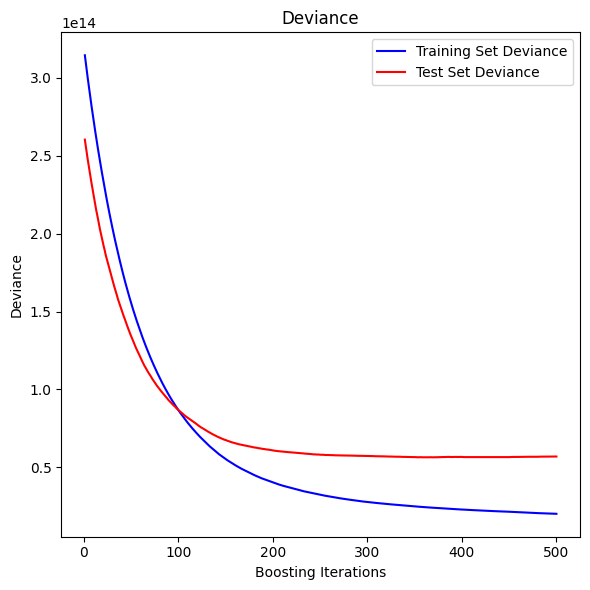

In [6]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

## Linear Regression

Linear Regression
Mean Squared Error: 97049143441316.06
R-squared: 0.6328919458514699


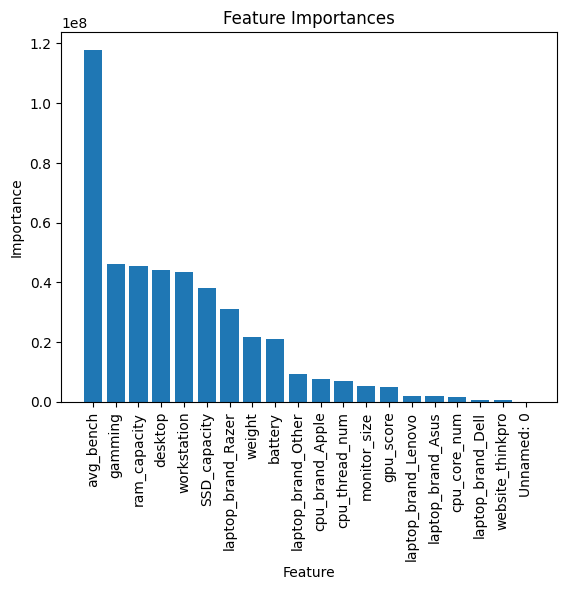

In [21]:
print("Linear Regression")

# Train the linear regression model on the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Obtain the feature importances
importances = np.abs(regressor.coef_)

# Create a list of feature names and their importances
feature_importances = [(feature, importance) for feature, importance in zip(X_train.columns, importances)]

# Sort the feature importances in descending order
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Plot the feature importances
features, importances = zip(*feature_importances)
plt.bar(features, importances, align='center')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.show()


## Decision Tree

Decision Tree Regression
Best parameter:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error:  89305605254192.19
R-squared: 0.6621834484376707


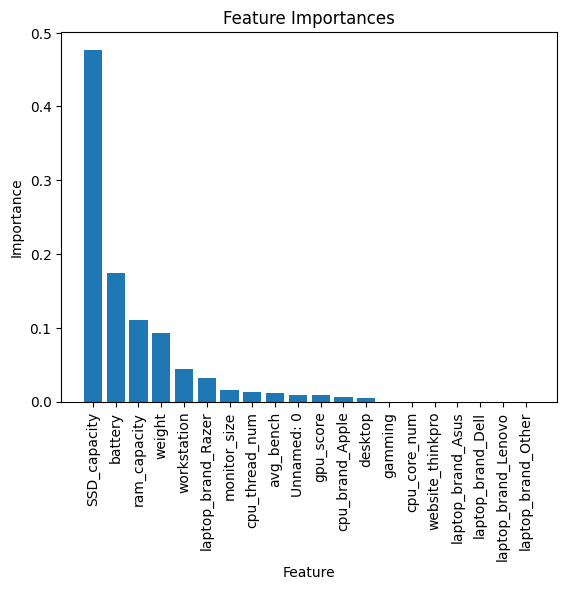

In [22]:
print("Decision Tree Regression")

# Define the model
dtr = DecisionTreeRegressor()

# Define the hyperparameter grid to search
param_grid = {'max_depth': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [1, 2, 3, 4]
              }

# Grid search to find the best hyperparameters
grid_search = GridSearchCV(dtr, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameter: ", grid_search.best_params_)

# Use the best hyperparameters to train the final model
dtr = grid_search.best_estimator_
dtr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dtr.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Evaluate the performance of the model using R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Obtain the feature importances
importances = dtr.feature_importances_

# Create a list of feature names and their importances
feature_importances = [(feature, importance) for feature, importance in zip(X_train.columns, importances)]

# Sort the feature importances in descending order
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Print the feature importances
'''for feature, importance in feature_importances:
    print(feature, ":", importance)
'''

# Plot the feature importances
features, importances = zip(*feature_importances)
plt.bar(features, importances, align='center')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.show()

## Random Forest

Random Forest Regressor
Best parameter:  {'bootstrap': True, 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 50665511763493.5
R-squared: 0.8083474333064826


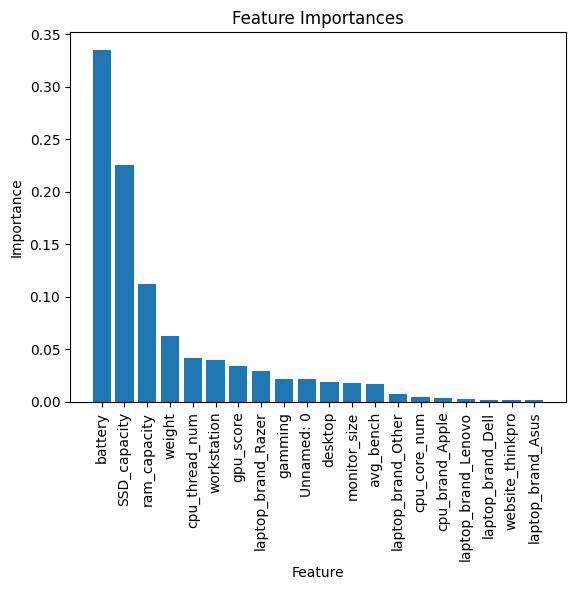

In [23]:
#Random Forest Regression
print("Random Forest Regressor")

#Define the model
regressor = RandomForestRegressor()

#Define the hyperparameter grid to search
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
                'max_depth' : [1, 2, 3, 4, 5],
                'max_depth': [1, 5, 10, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_leaf_nodes': [None, 10, 20, 30],
                'bootstrap': [True, False]
                }               

#Grid search to find the best hyperparameter
grid_search = GridSearchCV(regressor, param_grid, cv = 10)
grid_search.fit(X_train, y_train)
print("Best parameter: ", grid_search.best_params_)

# Train the random forest regression model on the training data
regressor = grid_search.best_estimator_
regressor.fit(X_train, y_train)



# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Evaluate the performance of the model using R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Obtain the feature importances
importances = regressor.feature_importances_

# Create a list of feature names and their importances
feature_importances = [(feature, importance) for feature, importance in zip(X_train.columns, importances)]

# Sort the feature importances in descending order
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Print the feature importances
'''for feature, importance in feature_importances:
    print(feature, ":", importance)
'''

# Plot the feature importances
features, importances = zip(*feature_importances)
plt.bar(features, importances, align='center')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.show()